In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [3]:
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

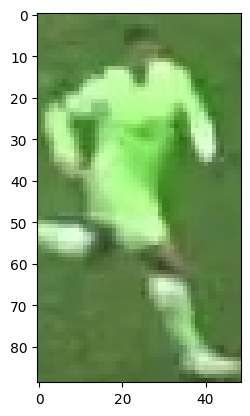

In [4]:
plt.imshow(image)
plt.show()

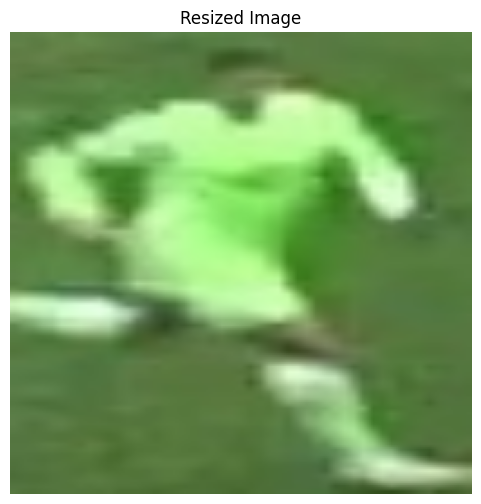

In [25]:
# Step 2: Resize the image (optional, you can skip this if the image is already the right size)
image_resized = cv2.resize(image, (256, 256))
plt.figure(figsize=(6,6))
plt.imshow(image_resized)
plt.title('Resized Image')
plt.axis('off')
plt.show()

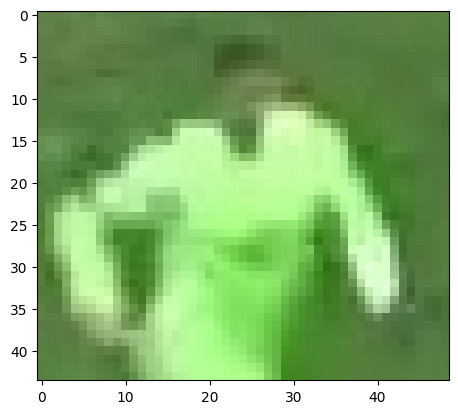

In [5]:
top_half_image=  image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

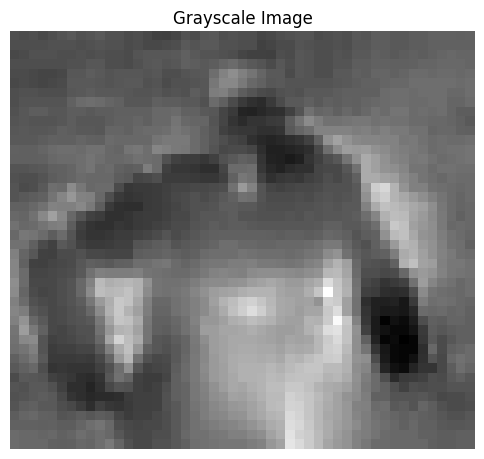

In [26]:
gray_image = cv2.cvtColor(top_half_image, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(6,6))
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

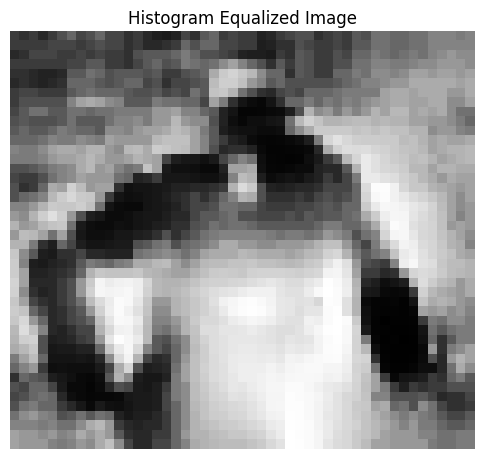

In [27]:
equalized_image = cv2.equalizeHist(gray_image)
plt.figure(figsize=(6,6))
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')
plt.show()

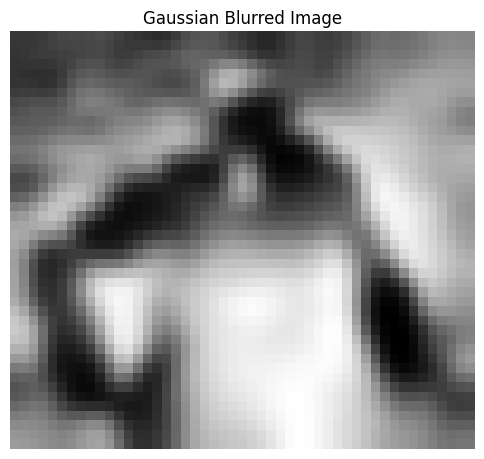

In [28]:
blurred_image = cv2.GaussianBlur(equalized_image, (5, 5), 0)
plt.figure(figsize=(6,6))
plt.imshow(blurred_image, cmap='gray')
plt.title('Gaussian Blurred Image')
plt.axis('off')
plt.show()

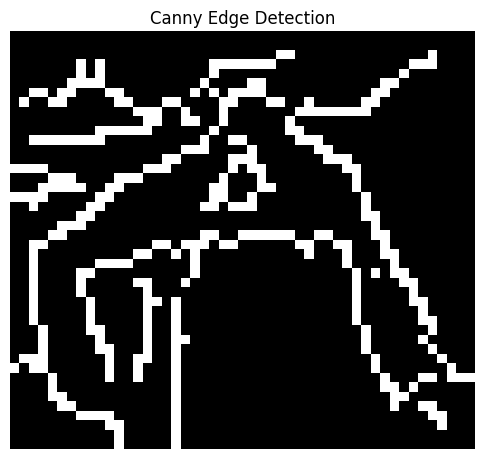

In [29]:
edges = cv2.Canny(blurred_image, 100, 200)
plt.figure(figsize=(6,6))
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()

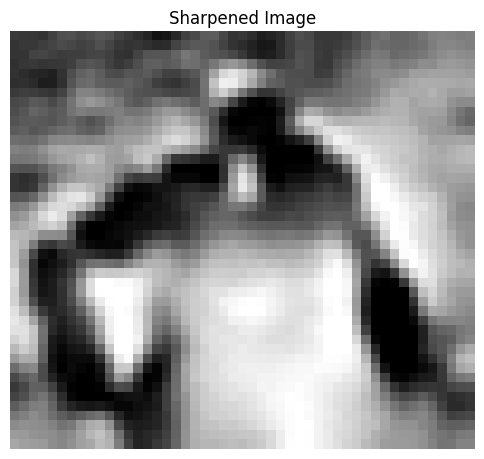

In [30]:
kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])
sharpened_image = cv2.filter2D(blurred_image, -1, kernel)
plt.figure(figsize=(6,6))
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')
plt.show()

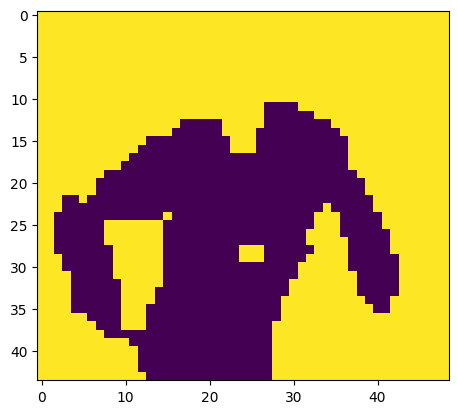

In [20]:
# Reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the labels into the orginal image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [21]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [22]:
player_cluster = 1-non_player_cluster
print(player_cluster)

0


In [23]:
kmeans.cluster_centers_[player_cluster]

array([ 50.67317708, 102.87890625, 234.36848958])